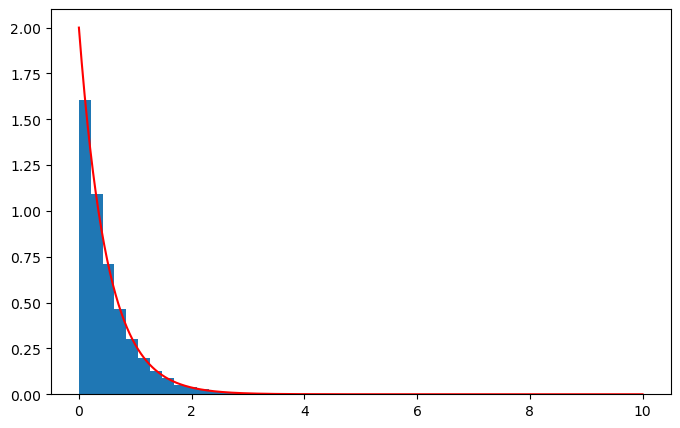

K-S statistic: 0.008058717548975358, p-value: 0.5319373381611257


In [26]:
# Exercise 3 Generating Continuous Random Variables

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest
from scipy.stats import ks_2samp

# (a) Exponential Distribuiton
n = 10000
U = np.random.uniform(0, 1, size=n)
lam = 2
X = -np.log(U)/lam

# Real density
x = np.linspace(0,10,1000)
fe = lam * np.exp(-lam * x)

plt.figure(figsize=(8, 5))
plt.hist(X, bins = 30, density=True)
plt.plot(x, fe, 'r-')
plt.show()

D, p_value = kstest(X, 'expon', args=(0, 1/lam))
print(f"K-S statistic: {D}, p-value: {p_value}")

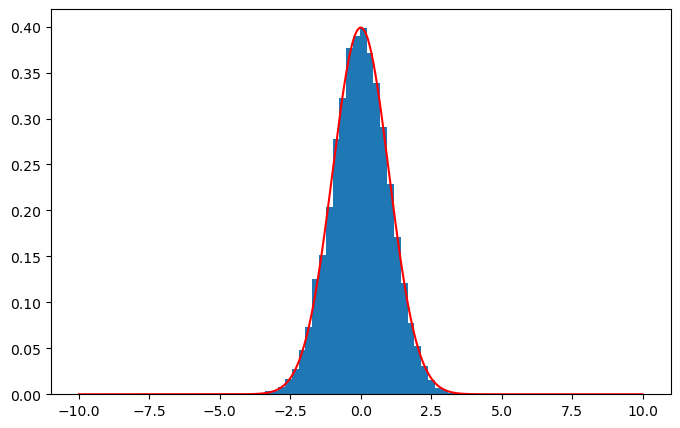

K-S statistic: 0.004970583755845956, p-value: 0.964763168113877


In [32]:
# (b) Normal Distribution with Box-Mueller method
U1 = np.random.uniform(0, 1, size=n)
U2 = np.random.uniform(0, 1, size=n)
theta = 2 * np.pi * U2
r = np.sqrt(-2 * np.log(U1))
Z1 = r * np.cos(theta)

# Real density
x = np.linspace(-10,10,1000)
fn = 1/(np.sqrt(2*np.pi)) * np.exp(-x**2/2)

plt.figure(figsize=(8, 5))
plt.hist(Z1, bins = 30, density=True)
plt.plot(x, fn, 'r-')
plt.show()

D, p_value = kstest(Z1, 'norm', args=(0,1))
print(f"K-S statistic: {D}, p-value: {p_value}")


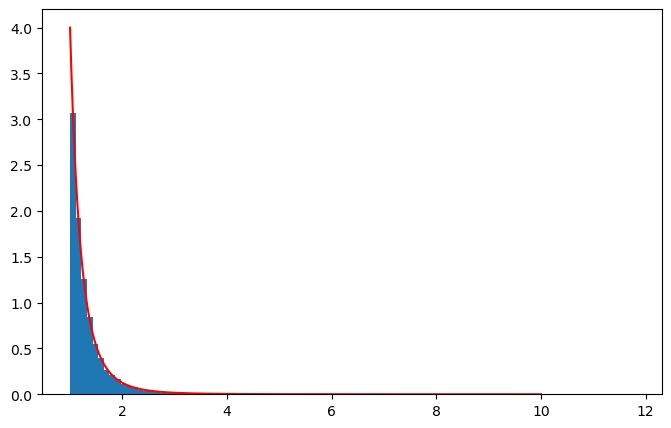

K-S statistic: 0.008034895166737221, p-value: 0.5358513133890319


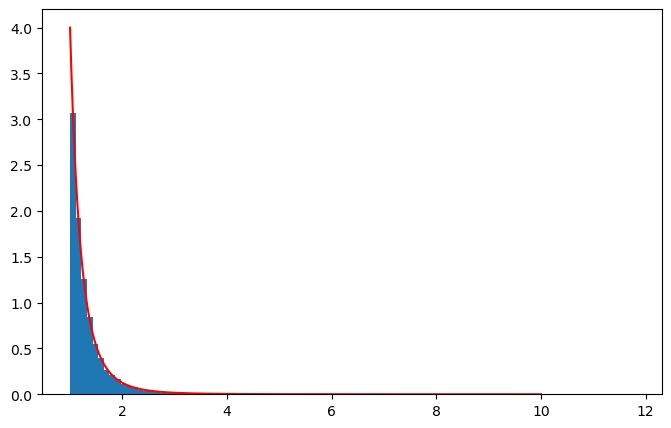

K-S statistic: 0.008034895166737221, p-value: 0.5358513133890319


In [125]:
# (c) Pareto Distribution 

beta = 1
#k = 2.05
#k = 2.5
#k = 3
k = 4

X = beta * U**(-1/k)
X = X[X<=20]
# Real density
x = np.linspace(beta,10,1000)
fp = k * beta **k / x ** (k+1)

plt.figure(figsize=(8, 5))
plt.hist(X, bins = 100, density=True)
plt.plot(x, fp, 'r-')
plt.show()
D, p_value = kstest(X, 'pareto', args=(k, 0, beta))
print(f"K-S statistic: {D}, p-value: {p_value}")


k = 4
X = beta * U**(-1/k)
X = X[X<=20]
# Real density
x = np.linspace(beta,10,1000)
fp = k * beta **k / x ** (k+1)

plt.figure(figsize=(8, 5))
plt.hist(X, bins = 100, density=True)
plt.plot(x, fp, 'r-')
plt.show()
D, p_value = kstest(X, 'pareto', args=(k, 0, beta))
print(f"K-S statistic: {D}, p-value: {p_value}")

In [149]:
# Point 2

# Pareto distribution
beta = 1
k = 2.05

X = beta * U**(-1/k)

# Statistics
mu = np.mean(X)
var = np.var(X, ddof = 1)

# Theoretical moments
mu_ther = beta * k / (k-1)
var_ther = beta**2 * k / ((k-1)**2 * (k-2))

print(f'sample mean: {mu}, theoretical mean: {mu_ther}')
print(f'Sample variance: {var}, theoretical variance: {var_ther}')


sample mean: 1.990690924366375, theoretical mean: 1.9523809523809526
Sample variance: 27.54304769466283, theoretical variance: 37.18820861678019


In [150]:
# Point 2

# Pareto distribution for multiple k values
beta = 1
k_values = [2.05, 2.5, 3, 4]

for k in k_values:
    X = beta * U**(-1/k)

    # Statistics
    mu = np.mean(X)
    var = np.var(X, ddof=1)

    # Theoretical moments
    mu_ther = beta * k / (k-1)
    var_ther = beta**2 * k / ((k-1)**2 * (k-2))

    print(f'k = {k}')
    print(f'  sample mean: {mu}, theoretical mean: {mu_ther}')
    print(f'  sample variance: {var}, theoretical variance: {var_ther}')
    print()

k = 2.05
  sample mean: 1.990690924366375, theoretical mean: 1.9523809523809526
  sample variance: 27.54304769466283, theoretical variance: 37.18820861678019

k = 2.5
  sample mean: 1.6800366368775645, theoretical mean: 1.6666666666666667
  sample variance: 3.9754157350026587, theoretical variance: 2.2222222222222223

k = 3
  sample mean: 1.5063056449536356, theoretical mean: 1.5
  sample variance: 1.085765608019664, theoretical variance: 0.75

k = 4
  sample mean: 1.3359944299077198, theoretical mean: 1.3333333333333333
  sample variance: 0.2596481618650641, theoretical variance: 0.2222222222222222



In [154]:
# Point 3
from scipy.stats import t
from scipy.stats import chi2

n = 10
df = n-1
alpha = 0.05

mean_inside = 0
var_inside = 0

for _ in range(100):

    U1 = np.random.uniform(0, 1, size=n)
    U2 = np.random.uniform(0, 1, size=n)
    theta = 2 * np.pi * U2
    r = np.sqrt(-2 * np.log(U1))
    Z1 = r * np.cos(theta)

    # Since we don't know the variance we use a t-test
    mu = np.mean(Z1)
    sigma = np.sqrt(np.var(Z1, ddof = 1))
    t_quant = t.ppf(1-alpha/2, df)
    CI_mean = [mu - t_quant * sigma/np.sqrt(n), mu + t_quant * sigma/np.sqrt(n)]

    if CI_mean[0] <= 0 <= CI_mean[1]:
        mean_inside += 1

    chi2_upper = chi2.ppf(1 - alpha / 2, df)
    chi2_lower = chi2.ppf(alpha / 2, df)
    CI_var = [(n-1)*sigma**2/chi2_upper, (n-1)*sigma**2/chi2_lower]

    if CI_var[0] <= 1 <= CI_var[1]:
        var_inside += 1

print(mean_inside)
print(var_inside)





94
93


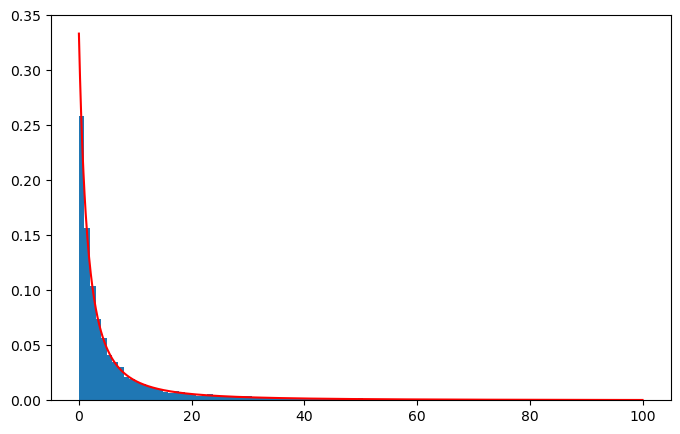

In [156]:
# Pareto distribution using composition
n = 10000
mu = 3
k = 1
# First generat Y from exp(mu)
U1 = np.random.uniform(0,1, size = n)
Y = -np.log(U1)/mu

# Generate X from exp(y)
U2 = np.random.uniform(0,1, size = n)
X = -np.log(U2)/Y

#Remove too extreme values
X = X[X<=100]

# Real density
x = np.linspace(0,100,1000)
fp = 1/mu/((1 + x/mu)**2)

plt.figure(figsize=(8, 5))
plt.hist(X, bins = 100, density=True)
plt.plot(x, fp, 'r-')
plt.show()


